# Plotting with Sliders

Kernel: Python 3, system-wide



## Example 1: ipywidget's `@interact`

In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 2000)

@interact(f=["sin", "cos"], w=(0, 50), A=(1, 10), phi=(0, 20, 0.1))
def update(f, w=1, A=1, phi=0):
    if f == "sin":
        func = np.sin
    elif f == "cos":
        func = np.cos

    plt.figure(figsize=(11, 6))
    plt.plot(x, A * func(w * x + phi))
    plt.title("simple line example")
    plt.ylim((-3, 3))
    plt.grid()
    plt.show()

interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

### Demo Rendering of the above:

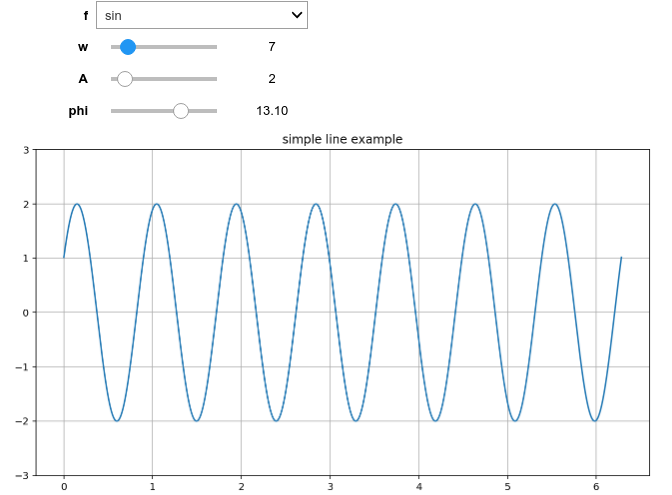

## Example 2

https://docs.bokeh.org/en/latest/docs/gallery/slider.html

**Changes** to the example: do not save to an html file, but just show the constructed layout

**Important** load bokeh for the notbeook in a separate cell!

In [2]:
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [3]:
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

code = """\
const data = source.data;
const A = amp.value;
const k = freq.value;
const phi = phase.value;
const B = offset.value;
const x = data['x']
const y = data['y']
for (var i = 0; i < x.length; i++) {
    y[i] = B + A*Math.sin(k*x[i]+phi);
}
source.change.emit();
"""

callback = CustomJS(args=dict(source=source,
                              amp=amp_slider,
                              freq=freq_slider,
                              phase=phase_slider,
                              offset=offset_slider),
                    code=code)

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

show(layout)